Data Link:
    https://www.kaggle.com/c/web-traffic-time-series-forecasting/data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
base_url = 'data/'

key_1 = pd.read_csv(base_url+'key_1.csv')
train_1 = pd.read_csv(base_url+'train_1.csv')
sample_submission_1 = pd.read_csv(base_url+'sample_submission_1.csv')

In [3]:
print(train_1.shape, key_1.shape, sample_submission_1.shape)

(145063, 551) (8703780, 2) (8703780, 2)


### Understanding the DATA
train_1.csv

Contains 145.063 rows representing different Wikipedia URL pages
Contains 551 columns, first column is the URL page and then each column represents a value in time from 2015-07-01 to 2016-12-31 (1.5 year, total of 550 days), where the value is the number of visits to the page in that day
Jul/2015 - 31 days
Aug/2015 - 31 days
Sep/2015 - 30 days
Oct/2015 - 31 days
Nov/2015 - 30 days
Dec/2015 - 31 days

Total: 184 days

2016 - 366 days (leap year)

Total: 184 + 366 = 550 days

In [4]:
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


key_1.csv

Contains 8.703.780 rows, each one representing the "URL page"_"datetime", where datetime varies from 2017-01-01 to 2017-03-01 (total of 60 days), which is the result of the total number of pages multiplied by 60 days (145063 x 60 = 8.703.780)
Contains 2 columns, first one is the "URL page"_"datetime", second one is the ID for that page

In [5]:
key_1.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [6]:
print(key_1.Page[0])
print
print(key_1.Page[59])
print
print(key_1.Page[60])

!vote_en.wikipedia.org_all-access_all-agents_2017-01-01
!vote_en.wikipedia.org_all-access_all-agents_2017-03-01
!vote_en.wikipedia.org_all-access_spider_2017-01-01


sample_submission_1.csv

Contains 8.703.780 rows, each one having the ID for the page and respective number of visits to the page at that datetime

In [7]:
sample_submission_1.head()

,Id,Visits
0,bf4edcf969af,0
1,929ed2bf52b9,0
2,ff29d0f51d5c,0
3,e98873359be6,0
4,fa012434263a,0


In summary:

We need to predict the number of visits for the period between 2017-01-01 to 2017-03-1 (60 days) from training data (train_1) containing the visits to the 145063 pages in previous period given between 2015-07-01 to 2016-12-31 (550 days).

### Exploratory Data Analisys (EDA)

In [8]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [9]:
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [10]:
# Creating a list of wikipedia main sites 
sites = ["wikipedia.org", "commons.wikimedia.org", "www.mediawiki.org"]

In [11]:
# Function to create a new column having the site part of the article page
def filter_by_site(page):
    for site in sites:
        if site in page:
            return site

In [12]:
# Creating a new column having the site part of the article page
train_1['Site'] = train_1.Page.apply(filter_by_site)

In [13]:
# Creating a new column having the site part of the article page
train_1['Site'] = train_1.Page.apply(filter_by_site)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.figure(figsize=(12, 6))
plt.title("Number of Wikipedia Articles by Sites", fontsize="18")
train_1['Site'].value_counts().plot.bar(rot=0);

In [15]:
# Checking which country codes exist in the article pages
train_1.Page.str.split(pat=".wikipedia.org", expand=True).iloc[:,0].str[-3:].value_counts().index.to_list()

['_en', '_ja', '_de', '_fr', '_zh', '_ru', '_es', 'nts', 'der']

In [16]:
# Creating a list of country codes
train_1.Page.str.split(pat=".wikipedia.org", expand=True).iloc[:,0].str[-2:].value_counts().index.to_list()[0:7]

['en', 'ja', 'de', 'fr', 'zh', 'ru', 'es']

In [17]:
# Checking which agents + access exist in the article pages and creating a list with them
train_1.Page.str.split(pat=".wikipedia.org", expand=True).iloc[:,1].str[1:].value_counts().index.to_list()

['all-access_all-agents',
 'mobile-web_all-agents',
 'all-access_spider',
 'desktop_all-agents']

In [18]:
# Creating the list of country codes and agents
countries = train_1.Page.str.split(pat=".wikipedia.org", expand=True).iloc[:,0].str[-2:].value_counts().index.to_list()[0:7]
agents = train_1.Page.str.split(pat=".wikipedia.org", expand=True).iloc[:,1].str[1:].value_counts().index.to_list()

In [19]:
# Function to create a new column having the country code part of the article page
def filter_by_country(page):
    for country in countries:
        if "_"+country+"." in page:
            return country

In [20]:
# Creating a new column having the country code part of the article page
train_1['Country'] = train_1.Page.apply(filter_by_country)

In [21]:
# Function to create a new column having the agent + access part of the article page
def filter_by_agent(page):
    for agent in agents:
        if agent in page:
            return agent

In [22]:
# Creating a new column having the agent part of the article page
train_1['Agent'] = train_1.Page.apply(filter_by_agent)

In [23]:
# Understanding what are the NaN values for the Country column
# It seems that the URL page does not contain the country code for those cases

train_1.Page[train_1['Country'].isna() == True]

13332      Accueil_commons.wikimedia.org_all-access_spider
13333    Atlas_of_Asia_commons.wikimedia.org_all-access...
13334    Atlas_of_Europe_commons.wikimedia.org_all-acce...
13335    Atlas_of_World_War_II_commons.wikimedia.org_al...
13336    Atlas_of_colonialism_commons.wikimedia.org_all...
                               ...                        
84730    help:contents_www.mediawiki.org_all-access_spider
84731    how_to_contribute_www.mediawiki.org_all-access...
84732        mediawiki_www.mediawiki.org_all-access_spider
84733     special:book_www.mediawiki.org_all-access_spider
84734    special:translate_www.mediawiki.org_all-access...
Name: Page, Length: 17842, dtype: object

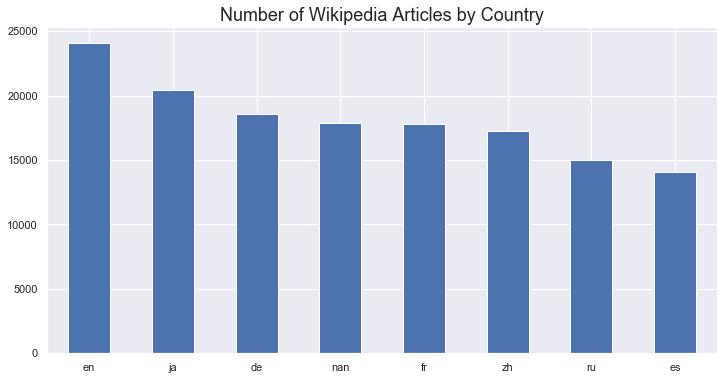

In [24]:
plt.figure(figsize=(12, 6))
plt.title("Number of Wikipedia Articles by Country", fontsize="18")
train_1['Country'].value_counts(dropna=False).plot.bar(rot=0);

In [25]:
train_1['Agent'].value_counts(dropna=False)

all-access_all-agents    39402
mobile-web_all-agents    35939
all-access_spider        34913
desktop_all-agents       34809
Name: Agent, dtype: int64

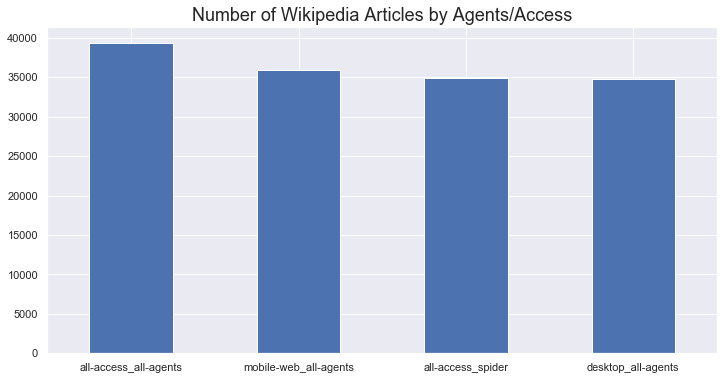

In [26]:
plt.figure(figsize=(12, 6))
plt.title("Number of Wikipedia Articles by Agents/Access", fontsize="18")
train_1['Agent'].value_counts().plot.bar(rot=0);

In [27]:
# Creating a sample dataset from the Train dataset for analysis
train_1_sample = train_1.drop(['Site','Country','Agent'], axis=1).sample(6, random_state=42)
train_1_sample

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
83529,Phabricator/Project_management_www.mediawiki.o...,6.0,6.0,4.0,6.0,8.0,6.0,4.0,0.0,2.0,...,6.0,6.0,11.0,4.0,6.0,5.0,7.0,6.0,6.0,9.0
70433,Now_You_See_Me_es.wikipedia.org_desktop_all-ag...,242.0,271.0,309.0,227.0,321.0,311.0,242.0,236.0,243.0,...,231.0,222.0,193.0,229.0,334.0,316.0,324.0,268.0,201.0,190.0
84729,Zürich_Hackathon_2014_www.mediawiki.org_all-ac...,3.0,19.0,19.0,30.0,21.0,24.0,17.0,178.0,40.0,...,6.0,7.0,4.0,8.0,2.0,4.0,9.0,4.0,11.0,12.0
7969,Érythrée_fr.wikipedia.org_desktop_all-agents,672.0,513.0,774.0,1164.0,546.0,755.0,555.0,494.0,4801.0,...,308.0,294.0,358.0,204.0,323.0,438.0,345.0,299.0,306.0,211.0
92077,Metallica_es.wikipedia.org_all-access_all-agents,1534.0,1644.0,1704.0,1569.0,1534.0,1577.0,1608.0,1731.0,1919.0,...,2367.0,2259.0,2229.0,2070.0,2774.0,2552.0,2524.0,2358.0,2291.0,2153.0
142080,Filipinas_es.wikipedia.org_all-access_spider,88.0,58.0,30.0,108.0,71.0,86.0,113.0,50.0,35.0,...,60.0,59.0,29.0,226.0,70.0,49.0,33.0,51.0,33.0,38.0


In [28]:
# Transposing the sample dataset to have Date Time at the index
train_1_sampleT = train_1_sample.drop('Page', axis=1).T
train_1_sampleT.columns = train_1_sample.Page.values
train_1_sampleT.shape

(550, 6)

In [29]:
train_1_sampleT.head()

,Phabricator/Project_management_www.mediawiki.org_all-access_spider,Now_You_See_Me_es.wikipedia.org_desktop_all-agents,Zürich_Hackathon_2014_www.mediawiki.org_all-access_spider,Érythrée_fr.wikipedia.org_desktop_all-agents,Metallica_es.wikipedia.org_all-access_all-agents,Filipinas_es.wikipedia.org_all-access_spider
2015-07-01,6.0,242.0,3.0,672.0,1534.0,88.0
2015-07-02,6.0,271.0,19.0,513.0,1644.0,58.0
2015-07-03,4.0,309.0,19.0,774.0,1704.0,30.0
2015-07-04,6.0,227.0,30.0,1164.0,1569.0,108.0
2015-07-05,8.0,321.0,21.0,546.0,1534.0,71.0


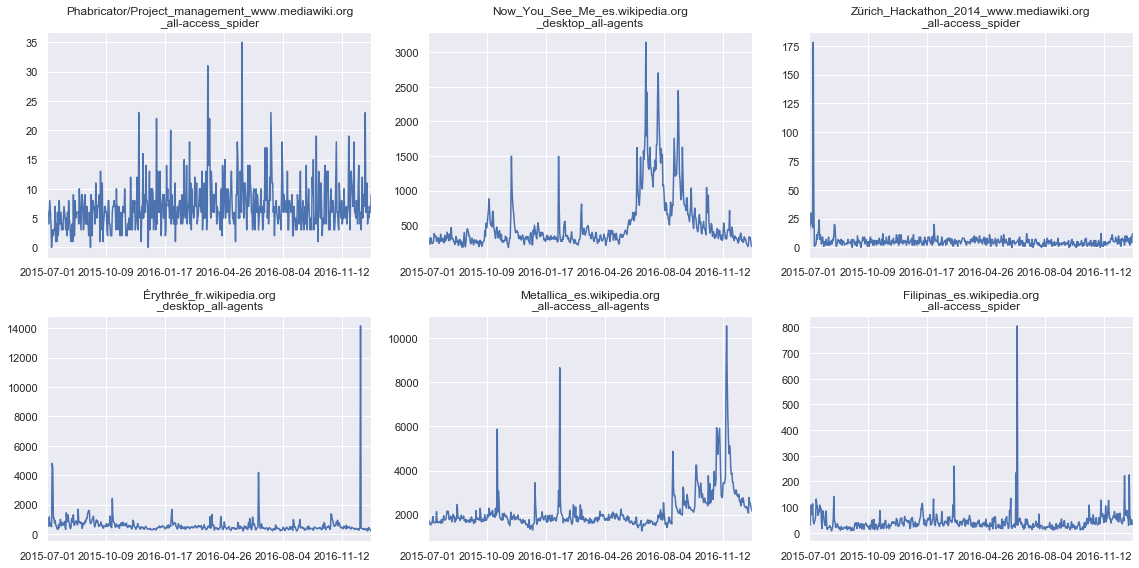

In [30]:
# Plotting the Series from the sample dataset 
plt.figure(figsize=(16,8))

for k, v in enumerate(train_1_sampleT.columns):
    plt.subplot(2, 3, k + 1)
    plt.title( str(v.split(".org")[0])+".org"+"\n"+str(v.split(".org")[1]) )
    train_1_sampleT[v].plot()

plt.tight_layout();

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


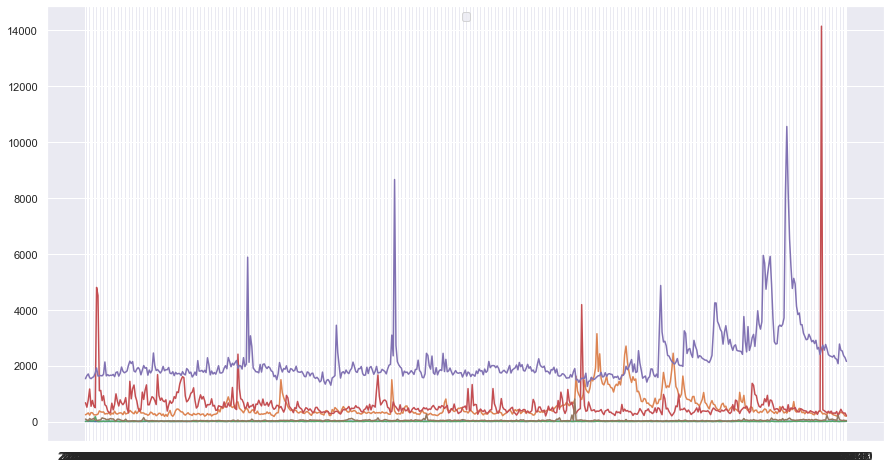

In [31]:
# Plotting the Series from the sample dataset at the same graph
plt.figure(figsize=(15,8))

for v in train_1_sampleT.columns:
    plt.plot(train_1_sampleT[v])
    plt.legend(loc='upper center');

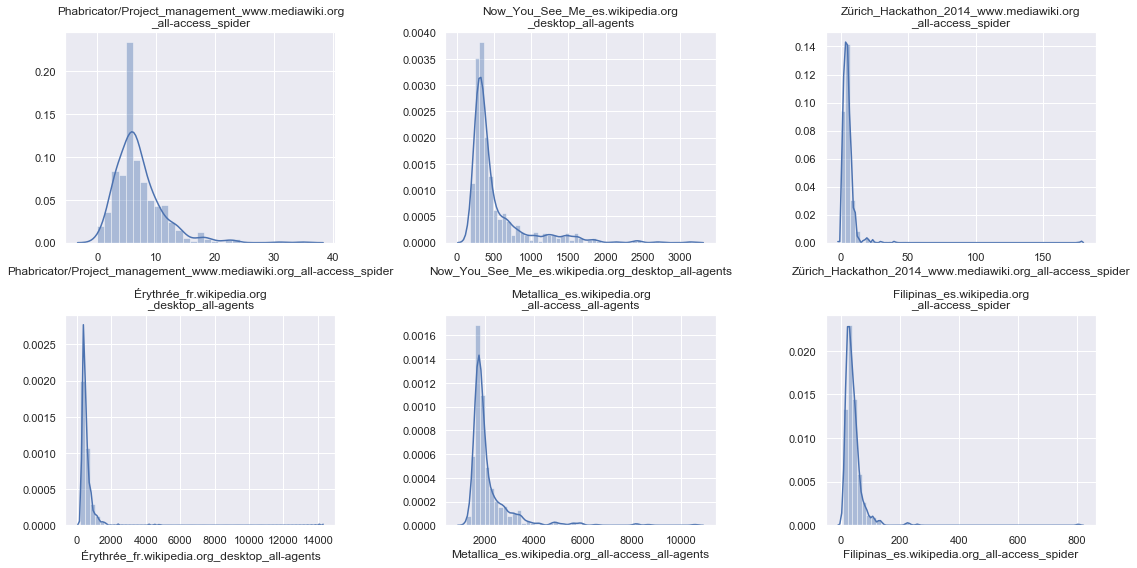

In [32]:
# Plotting the histograms for the Series from the sample dataset
plt.figure(figsize=(16,8))

for k, v in enumerate(train_1_sampleT.columns):
    plt.subplot(2, 3, k + 1)
    plt.title( str(v.split(".org")[0])+".org"+"\n"+str(v.split(".org")[1]) )
    sns.distplot(train_1_sampleT[v])

plt.tight_layout();

In [33]:
# Checking that the number of visits to the Wikipedia Articles have Gaussian Distribution (p-value=0)
from scipy.stats import kstest, ks_2samp

pages = list(train_1_sampleT.columns)

print("Kolgomorov-Smirnov - Normality Test")
print()

for p in pages:
    print(p,':', kstest(train_1_sampleT[p], 'norm', alternative = 'less'))    

Kolgomorov-Smirnov - Normality Test

Phabricator/Project_management_www.mediawiki.org_all-access_spider : KstestResult(statistic=0.9536135044154571, pvalue=0.0)
Now_You_See_Me_es.wikipedia.org_desktop_all-agents : KstestResult(statistic=1.0, pvalue=0.0)
Zürich_Hackathon_2014_www.mediawiki.org_all-access_spider : KstestResult(statistic=0.8972498680518208, pvalue=0.0)
Érythrée_fr.wikipedia.org_desktop_all-agents : KstestResult(statistic=1.0, pvalue=0.0)
Metallica_es.wikipedia.org_all-access_all-agents : KstestResult(statistic=1.0, pvalue=0.0)
Filipinas_es.wikipedia.org_all-access_spider : KstestResult(statistic=0.9999999999987201, pvalue=0.0)


### Exploring Groups of Time Series for Different Sites

In [34]:
# List of the main Wikipedia Article sites
sites

['wikipedia.org', 'commons.wikimedia.org', 'www.mediawiki.org']

In [35]:
# Creating sample datasets from the train dataset and filtering them by sites
train_1_sample_site0 = train_1[train_1['Site'] == sites[0]].drop(['Site','Country','Agent'], axis=1).sample(6, random_state=42)
train_1_sample_site1 = train_1[train_1['Site'] == sites[1]].drop(['Site','Country','Agent'], axis=1).sample(6, random_state=42)
train_1_sample_site2 = train_1[train_1['Site'] == sites[2]].drop(['Site','Country','Agent'], axis=1).sample(6, random_state=42)

# Transposing them to have the Date Time as index
train_1_sampleT_site0 = train_1_sample_site0.drop('Page', axis=1).T
train_1_sampleT_site0.columns = train_1_sample_site0.Page.values
train_1_sampleT_site1 = train_1_sample_site1.drop('Page', axis=1).T
train_1_sampleT_site1.columns = train_1_sample_site1.Page.values
train_1_sampleT_site2 = train_1_sample_site2.drop('Page', axis=1).T
train_1_sampleT_site2.columns = train_1_sample_site2.Page.values

### Time Series of "WIKIPEDIA.ORG" sites only

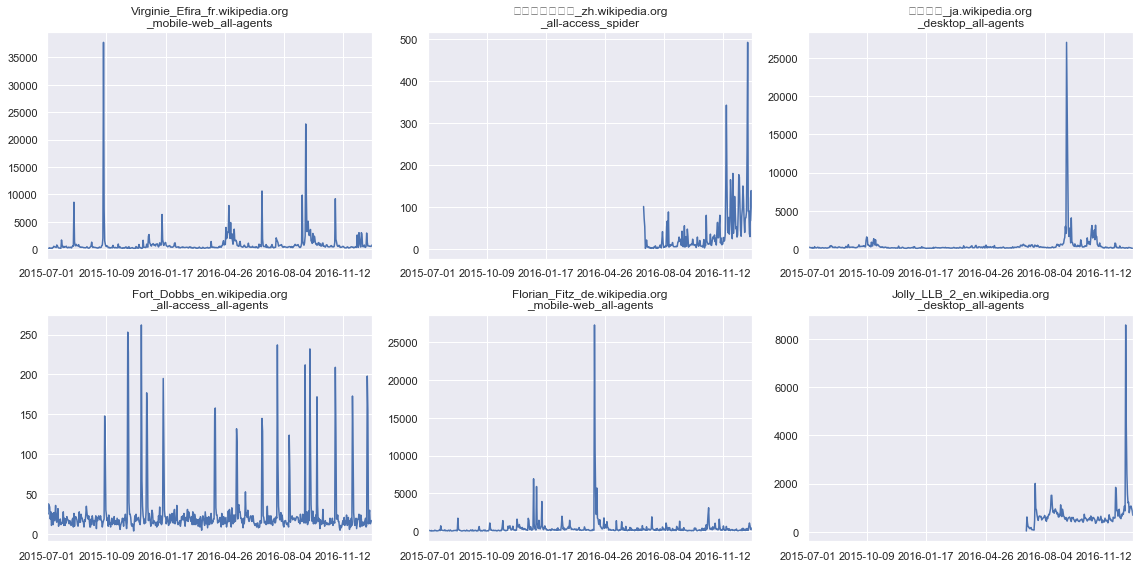

In [36]:
import warnings
warnings.filterwarnings('ignore')

# Plotting the Series from the sample datasets
plt.figure(figsize=(16,8))

for k, v in enumerate(train_1_sampleT_site0.columns):
    plt.subplot(2, 3, k + 1)
    plt.title( str(v.split(".org")[0])+".org"+"\n"+str(v.split(".org")[1]) )
    train_1_sampleT_site0[v].plot()

plt.tight_layout();

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


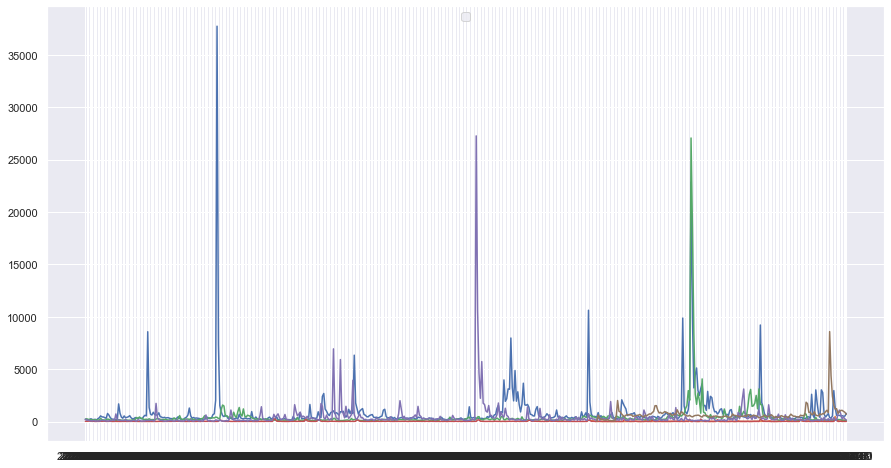

In [37]:
# Plotting the Series from the sample datasets at the same graph
plt.figure(figsize=(15,8))

for v in train_1_sampleT_site0.columns:
    plt.plot(train_1_sampleT_site0[v])
    plt.legend(loc='upper center');

### Time Series of "COMMONS.WIKIMEDIA.ORG" sites only

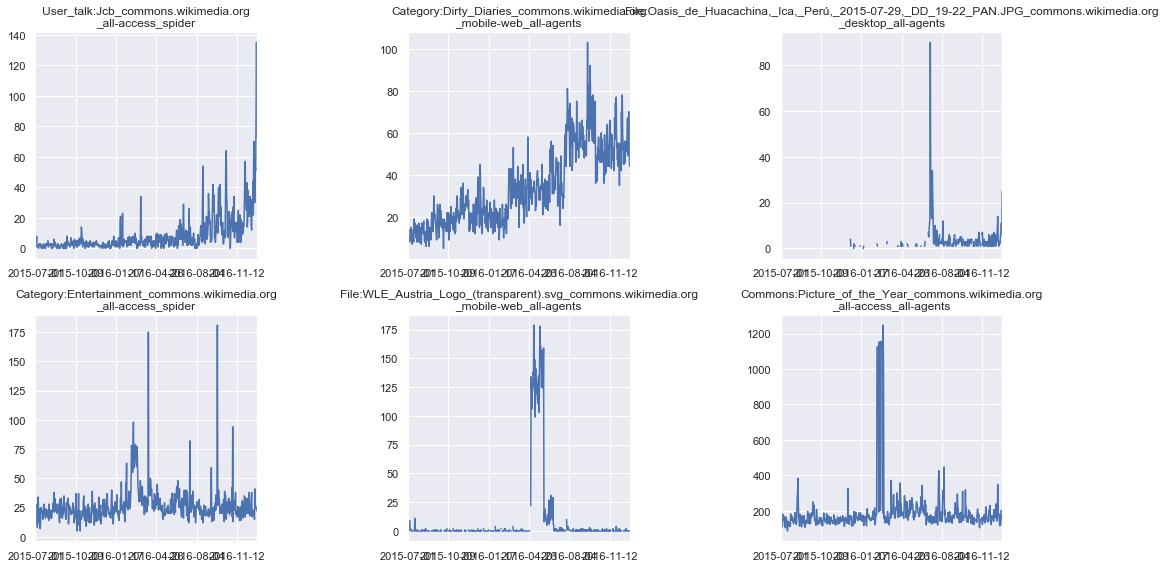

In [38]:
# Plotting the Series from the sample datasets
plt.figure(figsize=(16,8))

for k, v in enumerate(train_1_sampleT_site1.columns):
    plt.subplot(2, 3, k + 1)
    plt.title( str(v.split(".org")[0])+".org"+"\n"+str(v.split(".org")[1]) )
    train_1_sampleT_site1[v].plot()

plt.tight_layout();

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


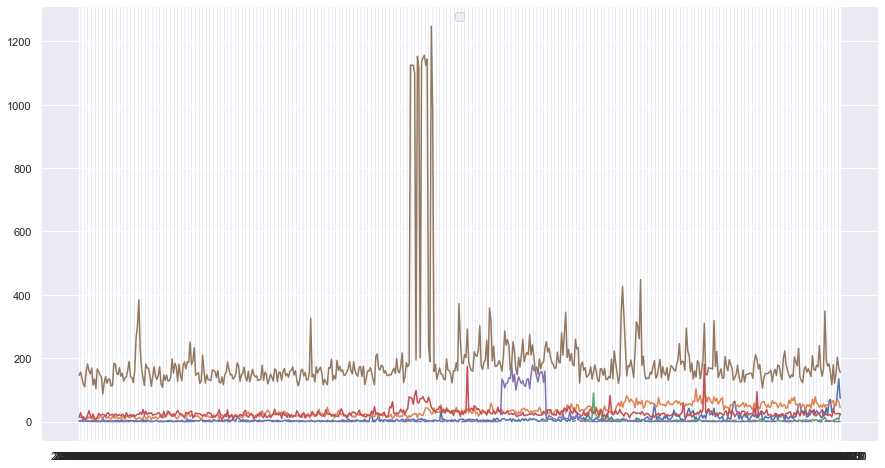

In [39]:
# Plotting the Series from the sample datasets at the same graph
plt.figure(figsize=(15,8))

for v in train_1_sampleT_site1.columns:
    plt.plot(train_1_sampleT_site1[v])
    plt.legend(loc='upper center');

### Time Series of "WWW.MEDIAWIKI.ORG" sites only

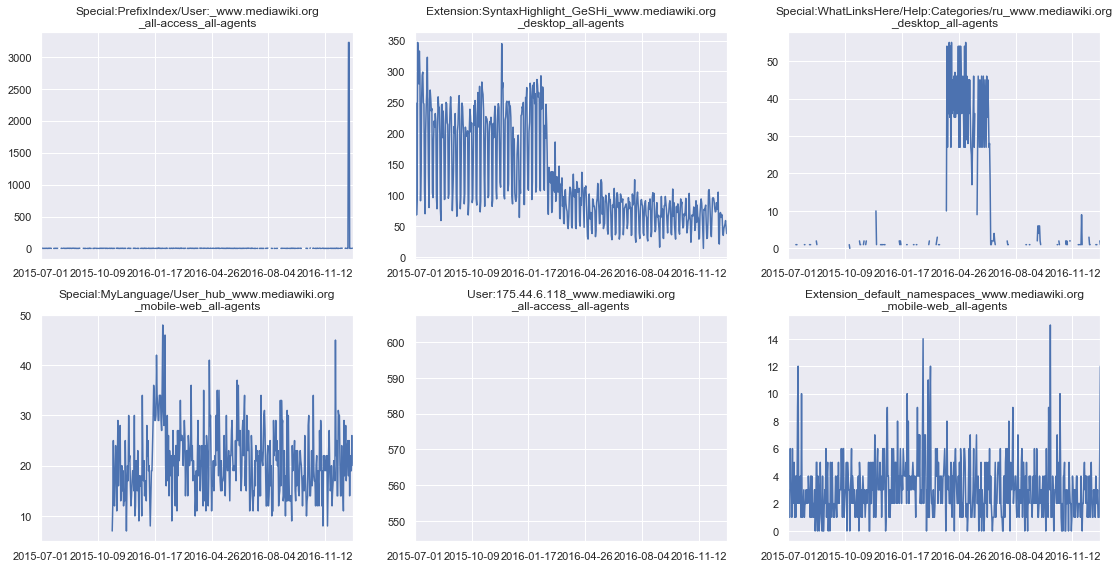

In [40]:
# Plotting the Series from the sample datasets
plt.figure(figsize=(16,8))

for k, v in enumerate(train_1_sampleT_site2.columns):
    plt.subplot(2, 3, k + 1)
    plt.title( str(v.split(".org")[0])+".org"+"\n"+str(v.split(".org")[1]) )
    train_1_sampleT_site2[v].plot()

plt.tight_layout();

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


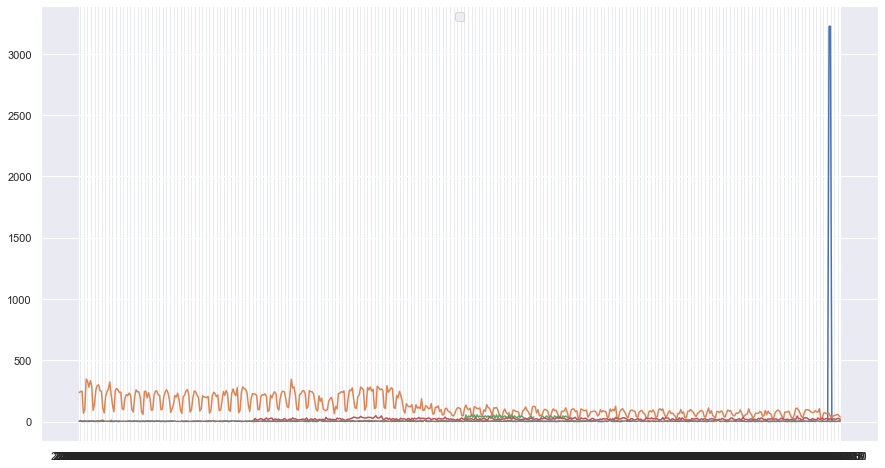

In [41]:
# Plotting the Series from the sample datasets at the same graph
plt.figure(figsize=(15,8))

for v in train_1_sampleT_site2.columns:
    plt.plot(train_1_sampleT_site2[v])
    plt.legend(loc='upper center');

In [42]:
train_1_sampleT_site2.columns[4]

'User:175.44.6.118_www.mediawiki.org_all-access_all-agents'

Notes:

For all the sites samples, some series presented missing data (NaNs).

For one of the WWW.MEDIAWIKI.ORG Series sample, noticed there was no data at all.
For this series, the URL contains the IP address instead of DNS name and it starts with "User:"

### Exploring a Group of Time Series for a Specific Country - DE

In [43]:
# List of the Wikipedia Article country codes
countries

['en', 'ja', 'de', 'fr', 'zh', 'ru', 'es']

In [44]:
# Creating a sample dataset from the train dataset for countries having "de" code
train_1_sample_de = train_1[train_1['Country'] == countries[2]].drop(['Site','Country','Agent'], axis=1).sample(6, random_state=42)

# Transposing the sample dataset to have Date Time at the index
train_1_sampleT_de = train_1_sample_de.drop('Page', axis=1).T
train_1_sampleT_de.columns = train_1_sample_de.Page.values

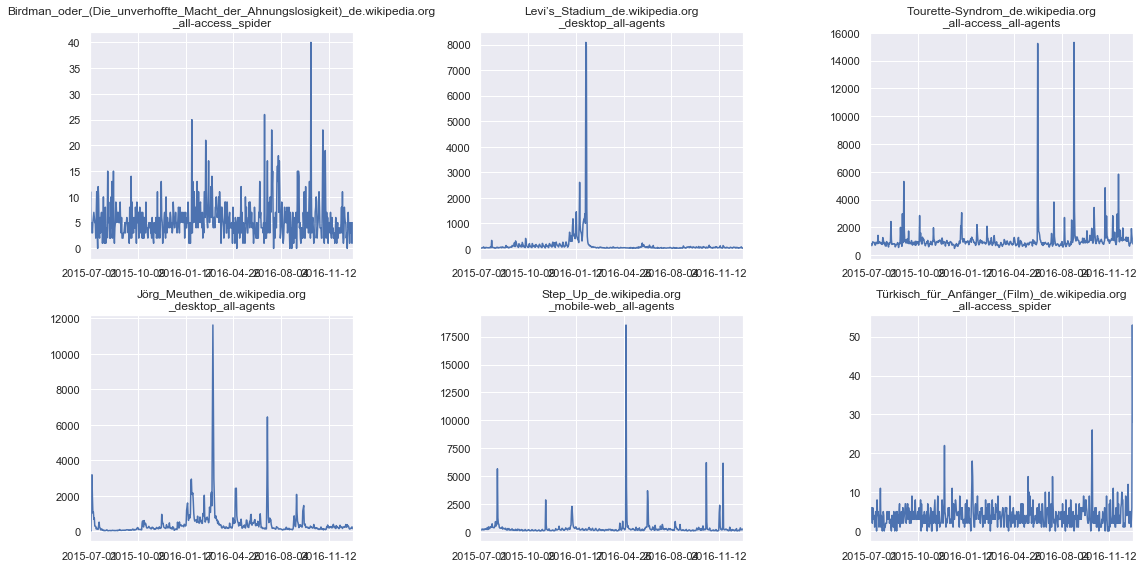

In [45]:
# Plotting the Series from the sample dataset
plt.figure(figsize=(16,8))

for k, v in enumerate(train_1_sampleT_de.columns):
    plt.subplot(2, 3, k + 1)
    plt.title( str(v.split(".org")[0])+".org"+"\n"+str(v.split(".org")[1]) )
    train_1_sampleT_de[v].plot()

plt.tight_layout();

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


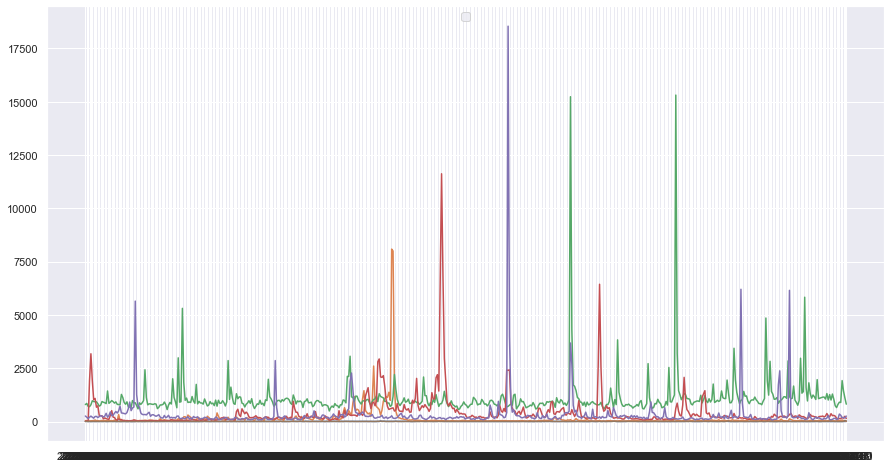

In [46]:
# Plotting the Series from the sample datasets at the same graph
plt.figure(figsize=(15,8))

for v in train_1_sampleT_de.columns:
    plt.plot(train_1_sampleT_de[v])
    plt.legend(loc='upper center');

### Modeling with Facebook Prophet
Facebook Prophet function is used do define a Prophet forecasting model in Python.

I will now use Prophet to model a specific Time Series got from samples of the training dataset.

In [ ]:
!pip install fbprophet

In [52]:
# Import Prophet library
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'